# 0.) Import and Clean data

In [1]:
import warnings

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
#drive.mount('/content/gdrive/', force_remount = True)

In [5]:
df = pd.read_csv("bank-additional-full.csv")

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [8]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [9]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


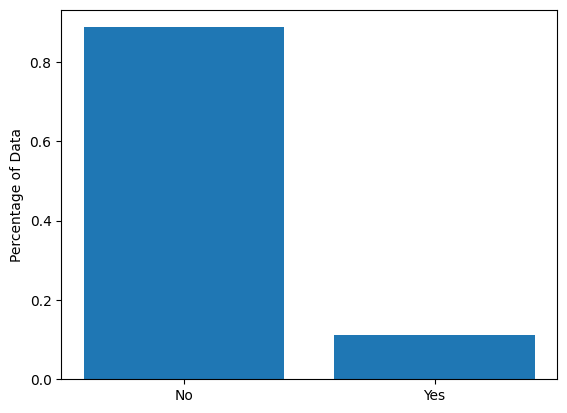

In [11]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [13]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_scaled,y_train = oversample.fit_resample(X_scaled,y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [14]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.211\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.48\ngini = 0.274\nsamples = 18688\nvalue = [15621, 3067]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= -0.029\ngini = 0.121\nsamples = 10929\nvalue = [10221, 708]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.102\nsamples = 10702\nvalue = [10126, 576]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.487\nsamples = 227\nvalue = [95, 132]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.321\ngini = 0.423\nsamples = 7759\nvalue = [5400, 2359]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.483\nsamples = 5594\nvalue = [3315, 2279]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.071\nsamples = 2165\nvalue = [2085, 80]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.425\nsamples = 32472\nvalue = [9959, 22513]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.723\ngini = 0.347\nsamples = 26585\nvalue = [5929, 20656]\nclas

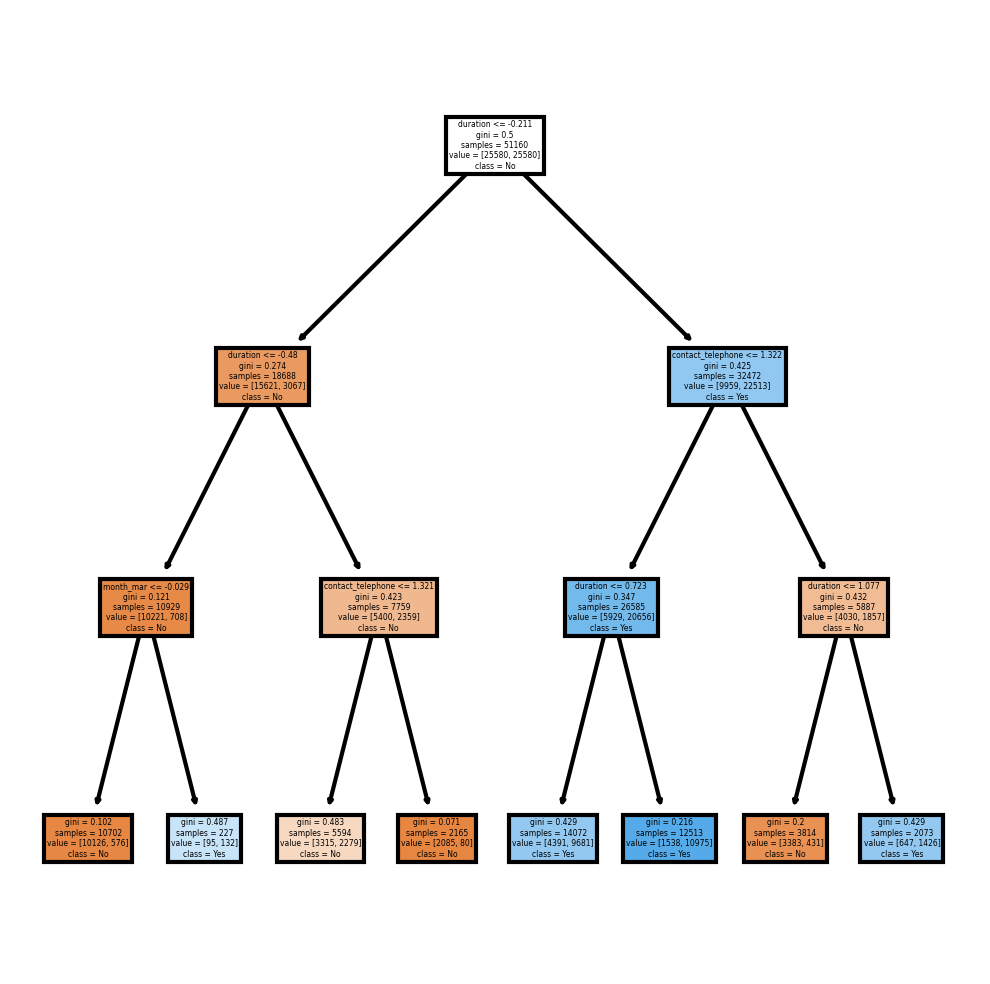

In [15]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [16]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

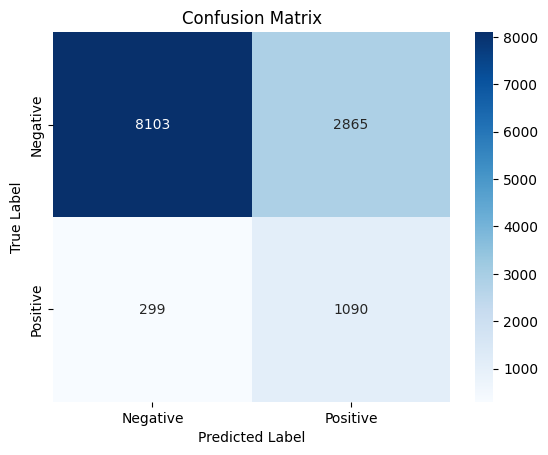

In [17]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [18]:
# Optimize the max Depth
dtree = DecisionTreeClassifier(max_depth = 3)

In [19]:
bagging = BaggingClassifier (estimator = dtree,
                 n_estimators = 100,
                 max_samples = 0.5,
                 max_features = 1.)
bagging.fit(X_scaled, y_train)

C:\Users\Swaggy.P\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=0.5, n_estimators=100)

In [20]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

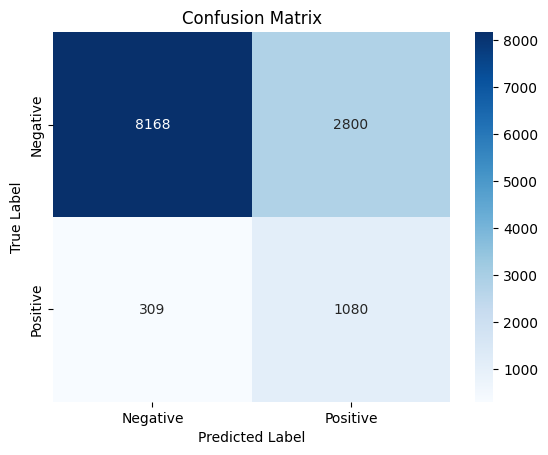

In [21]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
boost = AdaBoostClassifier(estimator=dtree,
                           n_estimators = 100)
boost.fit(X_scaled,y_train)

C:\Users\Swaggy.P\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100)

In [24]:
y_pred = boost.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

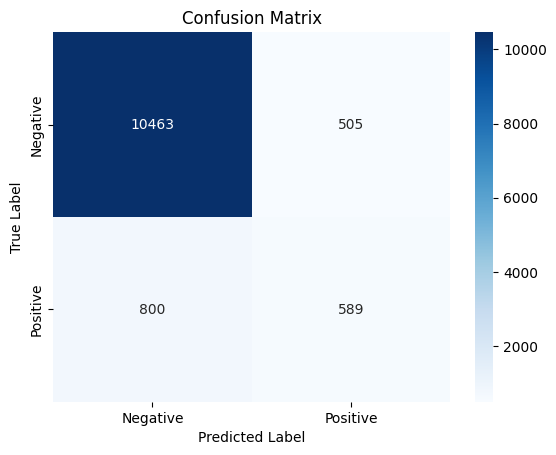

In [25]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**The boost model performs the best.**

# 5.) Train a logistic regression on the decision tree, boosted tree, bagged tree, interpret the coefficients and significance

In [26]:
#pip install mlens

In [27]:
from sklearn.linear_model import LogisticRegression

In [30]:
base_predictions = [bagging.predict(X_scaled), boost.predict(X_scaled), dtree_main.predict(X_scaled)]
x_base_learners = np.column_stack(predictions)

In [31]:
base_predictions = np.array(base_predictions).transpose()

In [32]:
super_learner = LogisticRegression()

In [33]:
super_learner.fit(x_base_learners, y_train)

C:\Users\Swaggy.P\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
super_learner.coef_

array([[0.75379178, 5.35303879, 0.77397081]])

The coefficient of the boosting model is the highest, which means that it contributes most to successful predictions of the meta model.This is kind of consistent with the confusion matrix.